In [1]:
__author__ = "Matteo Pariset"

In [2]:
%env XLA_PYTHON_CLIENT_MEM_FRACTION=.40

env: XLA_PYTHON_CLIENT_MEM_FRACTION=.40


In [6]:
import pandas as pd

from experiment import *
from training import *
from viewer import Viewer
from plotting import *

/home/ubuntu/anaconda3/envs/udsb/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/ubuntu/anaconda3/envs/udsb/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


# UDSB-F

## 3-subgroups dataset

### Complete marginals

In [7]:
no_outlier = Experiment.load("no-outlier", "no_outlier")

[INFO]: Reloading params from cache


mmd          0.008795
norm_rmsd    1.938436
l2           0.190098
w2           0.961021
dtype: float64


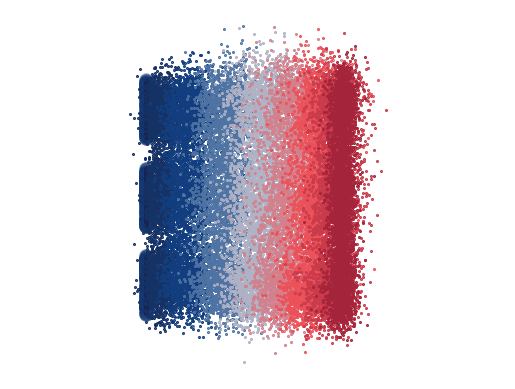

In [9]:
draw_trajs_with_killing(no_outlier)
plt.gca().legend().remove()
export_fig(f"usb_no_outlier_trajs")
plt.show()

### Incomplete _final_ marginal

#### Training

In [10]:
# weak_outlier_dataset_config = {
#     'dataset_name': "outlier-weak",
#     'state_dims': 2,
#     'killing_function_name': 'outlier_death',
# }

# final_mass = 875

# weak_outlier_experiment_config = {
#     ## Experiment-dependent variables ############################
#     'objective': "mean_matching",

#     'times': [0, 100],
#     'mass': [1000, final_mass],

#     'init_components_num': 2,
#     'end_components_num': 2,

#     'steps_num': 100,
#     'batch_size': 1024,
#     'paths_reuse': 5,
#     'hidden_dims': 32,

#     'ipf_mask_dead': False,
#     'ferryman_activate_final': False,

#     'splitting_births_frac': .0,
#     'reality_coefficient': .1,

#     'eps': 1e-7,
#     'neginf': -15,
#     'plusinf': 15,

#     'experiment_name': f"v4_weak_outliers",
# }

# weak_outlier_config = {
#     "dataset": weak_outlier_dataset_config,
#     "experiment": weak_outlier_experiment_config
# }

# weak_outlier_experiment = Experiment.create(weak_outlier_config)
# weak_outlier_trainer = Trainer(random.PRNGKey(0), weak_outlier_experiment)

# weak_outlier_trainer.train([1., 1., 1.])

# weak_outlier_experiment.save(f"v4_final_outlier_weak_mm_{weak_outlier_experiment.e.mass[-1]}")

In [11]:
# weak_out_viewer = Viewer(random.PRNGKey(0), weak_outlier_experiment)

# draw_patches(load_patches("outlier_death"), plt.gcf())
# plot_marginals(weak_out_viewer.get_fresh_marginal(FORWARD), weak_out_viewer.get_fresh_marginal(BACKWARD), projection=lambda x: x[...,:2])

# plt.axis("off");
# plt.gca().legend().remove()
# export_fig("usb_weak_outlier_875_marginals")

**Training results:**

875 performance

    mmd          0.011830
    norm_rmsd    1.594539
    l2           0.128644
    w2           0.829306

750 performance

    mmd          0.016627
    norm_rmsd    1.504423
    l2           0.647952
    w2           1.103273

660 performance

    mmd          0.028913
    norm_rmsd    1.477224
    l2           1.207493
    w2           1.630409

#### Inference

In [12]:
# Load experiments

no_out_experiment_prefix = "v4_final_outlier_weak_mm_ftt_"
no_out_end_masses = jnp.array([660., 750., 875., 1000.])
no_out_runs_num = no_out_end_masses.shape[0]

no_out_experiments, no_out_trajs, no_out_statuses = [], [], []
for em in no_out_end_masses:
    no_out_experiment = Experiment.load("outlier-weak", f"{no_out_experiment_prefix}{em:.0f}")
    no_out_viewer = Viewer(random.PRNGKey(0), no_out_experiment)
    run_traj, _, run_status = no_out_viewer.get_fresh_trajectories(FORWARD)
    no_out_experiments.append(no_out_experiment)
    no_out_trajs.append(run_traj)
    no_out_statuses.append(run_status)

no_out_trajs = jnp.stack(no_out_trajs)
no_out_statuses = jnp.stack(no_out_statuses)

[INFO]: Reloading params from cache
[INFO]: Reloading params from cache
[INFO]: Reloading params from cache
[INFO]: Reloading params from cache


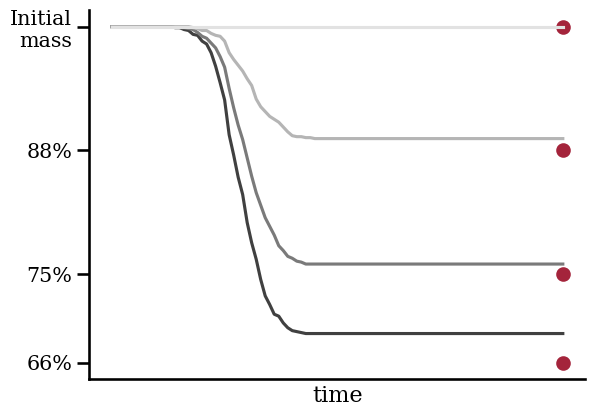

In [13]:
# Plot mass evolution

for run_idx, run_alive_num in enumerate(no_out_statuses.mean(axis=-1)):
    plt.plot(run_alive_num / run_alive_num[0] * 1000, c=plt.cm.Greys_r((run_idx+1)/(no_out_runs_num+1)));
    plt.scatter(100, no_out_end_masses[run_idx], c=cmap([1.]))

plt.yticks([660, 750, 875, 1000], labels=["66%", "75%", "88%", "Initial\nmass"])
plt.xticks([])
plt.xlabel("time")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

export_fig("usb_weak_outlier_counts")

mmd          0.029584
norm_rmsd    1.463733
l2           1.233523
w2           1.659382
dtype: float64


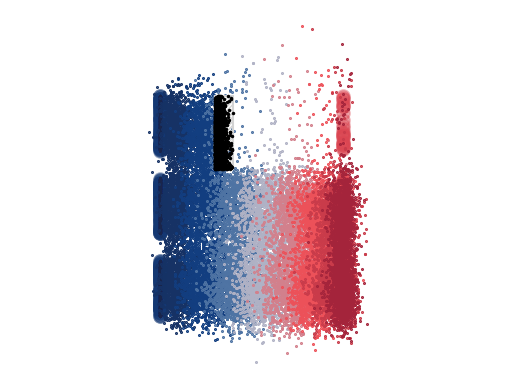

mmd          0.019210
norm_rmsd    1.499441
l2           0.806978
w2           1.230855
dtype: float64


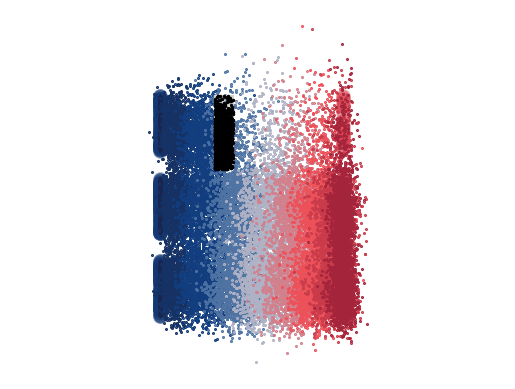

mmd          0.011807
norm_rmsd    1.591501
l2           0.127510
w2           0.828898
dtype: float64


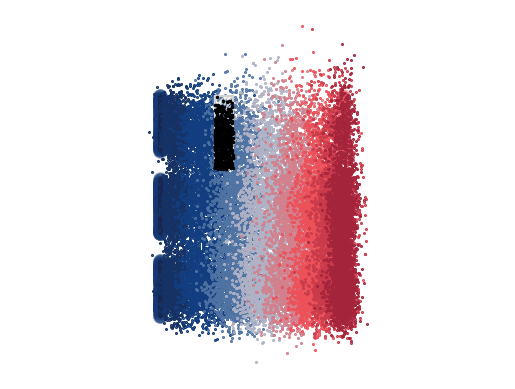

mmd          0.008795
norm_rmsd    1.938436
l2           0.190098
w2           0.961021
dtype: float64


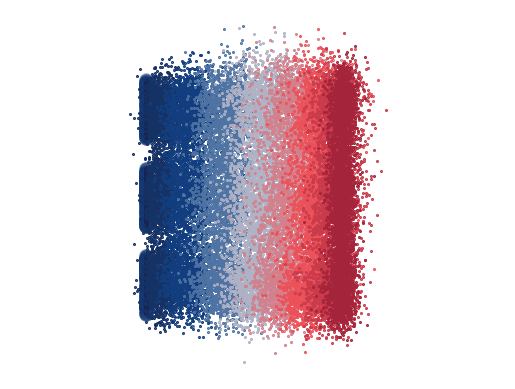

In [14]:
# Plot trajectories

for exp in no_out_experiments:
    draw_trajs_with_killing(exp)
    plt.gca().legend().remove()
    export_fig(f"usb_weak_outlier-{exp.e.mass[-1]}_trajs")
    plt.show()

### Incomplete _initial_ and _final_ marginals

#### Training

In [15]:
# outlier_death_birth_dataset_config = {
#     'dataset_name': "outlier-birth",
#     'state_dims': 2,
#     'killing_function_name': 'outlier_death_birth',
# }


# outlier_death_birth_experiment_config = {
#     ## Experiment-dependent variables ############################
#     'objective': "mean_matching",

#     'times': [0, 50, 100],
#     'mass': [1000, 500, 1000],

#     'init_components_num': 2,
#     'end_components_num': 2,

#     'steps_num': 100,
#     'batch_size': 1024,
#     'paths_reuse': 5,
#     'hidden_dims': 32,

#     'ipf_mask_dead': True,
#     'ferryman_activate_final': False,

#     'splitting_births_frac': .5,
#     'reality_coefficient': 0.,

#     'eps': 1e-7,
#     'neginf': -15,
#     'plusinf': 15,

#     'experiment_name': f"v4_outlier_death",
# }

# outlier_death_birth_config = {
#     "dataset": outlier_death_birth_dataset_config,
#     "experiment": outlier_death_birth_experiment_config
# }

# outlier_death_birth_experiment = Experiment.create(outlier_death_birth_config)
# outlier_death_birth_trainer = Trainer(random.PRNGKey(0), outlier_death_birth_experiment)

# outlier_death_birth_trainer.train([1.])

# Viewer(random.PRNGKey(0), outlier_death_birth_experiment).draw_trajectories(FORWARD, timesteps_num=101)

# outlier_death_birth_experiment.save("outlier_death_birth_improved")

#### Inference

In [16]:
outlier_death_birth = Experiment.load("outlier-birth", "outlier_death_birth_improved")

[INFO]: Reloading params from cache


<Figure size 640x480 with 0 Axes>

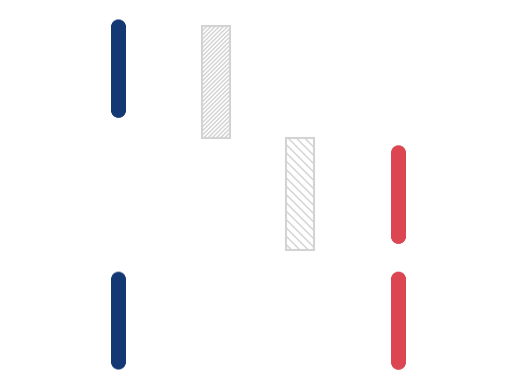

In [17]:
outlier_death_birth_viewer = Viewer(random.PRNGKey(0), outlier_death_birth)

draw_patches(load_patches("outlier_death_birth"), plt.gcf())
plot_marginals(outlier_death_birth_viewer.get_fresh_marginal(FORWARD), outlier_death_birth_viewer.get_fresh_marginal(BACKWARD), projection=lambda x: x[...,:2])

plt.axis("off");
plt.gca().legend().remove()
export_fig("usb_outlier_death_birth_marginals")

mmd          0.011167
norm_rmsd    1.213651
l2           0.193937
w2           0.726807
dtype: float64


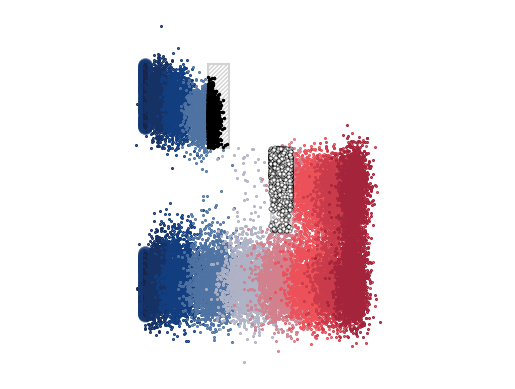

In [18]:
draw_trajs_with_killing(outlier_death_birth)
plt.gca().legend().remove()
export_fig(f"usb_outlier_death_birth_trajs")
plt.show()

## Horseshoe dataset

### Death-only

#### Training

See `sb_v4.0.2.py`

#### Inference

In [23]:
# Load experiments

d_experiment_prefix = "v4_final_death_mask_mass"
d_end_masses = jnp.linspace(450, 1000, 6)
d_runs_num = d_end_masses.shape[0]

d_experiments, d_trajs, d_statuses = [], [], []
for em in d_end_masses:
    d_experiment = Experiment.load("toy", f"{d_experiment_prefix}-{em:.0f}")
    d_viewer = Viewer(random.PRNGKey(0), d_experiment)
    run_traj, _, run_status = d_viewer.get_fresh_trajectories(FORWARD)
    d_experiments.append(d_experiment)
    d_trajs.append(run_traj)
    d_statuses.append(run_status)

d_trajs = jnp.stack(d_trajs)
d_statuses = jnp.stack(d_statuses)

[INFO]: Reloading params from cache
[INFO]: Reloading params from cache
[INFO]: Reloading params from cache
[INFO]: Reloading params from cache
[INFO]: Reloading params from cache
[INFO]: Reloading params from cache


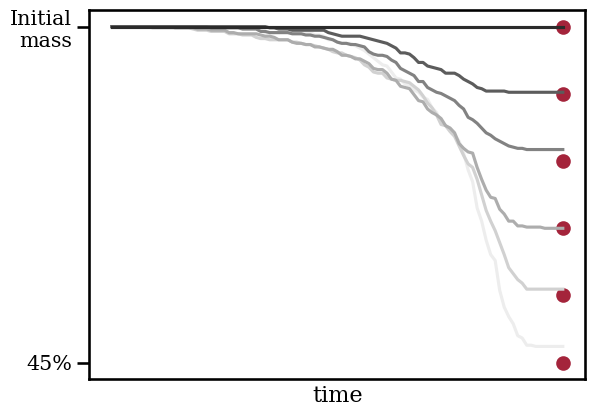

In [20]:
# Plot mass evolution

for run_idx, run_alive_num in enumerate(d_statuses.mean(axis=-1)):
    plt.plot(run_alive_num / run_alive_num[0] * 1000, c=plt.cm.Greys((run_idx+1)/(d_runs_num+1)));
    plt.scatter(100, d_end_masses[run_idx], c=cmap([1.]))

plt.yticks([450, 1000], labels=["45%", "Initial\nmass"])
plt.xticks([])
plt.xlabel("time")

export_fig("usb_toy_death_counts")

<Figure size 640x480 with 0 Axes>

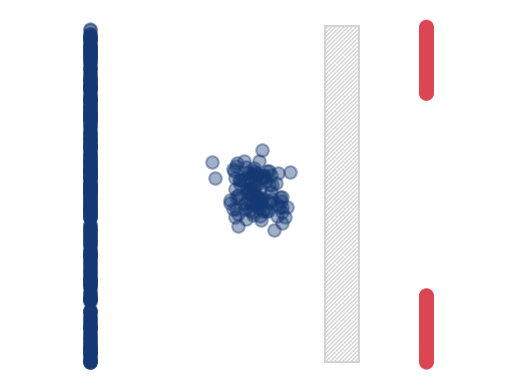

In [21]:
# Plot marginals

draw_patches(load_patches("centered_rectangle_dead_pool"), plt.gcf())
plot_marginals(d_viewer.get_fresh_marginal(FORWARD), d_viewer.get_fresh_marginal(BACKWARD), projection=lambda x: x[...,:2])

plt.axis("off");
plt.gca().legend().remove()
export_fig("usb_death_marginals")

mmd          0.012600
norm_rmsd    4.711763
l2           0.618049
w2           1.704155
dtype: float64


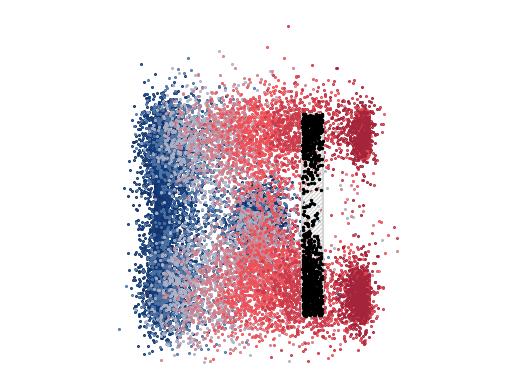

mmd          0.006738
norm_rmsd    4.584836
l2           0.314339
w2           1.277221
dtype: float64


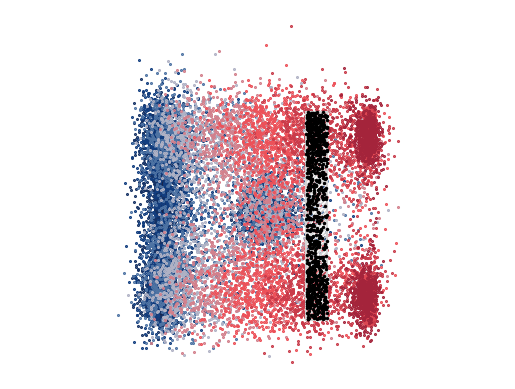

mmd          0.005652
norm_rmsd    4.500781
l2           0.192619
w2           1.084854
dtype: float64


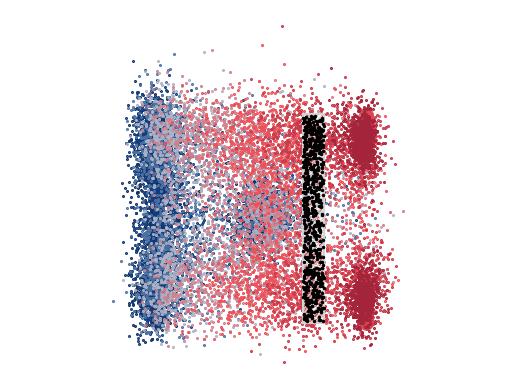

mmd          0.006575
norm_rmsd    4.595777
l2           0.310391
w2           1.280602
dtype: float64


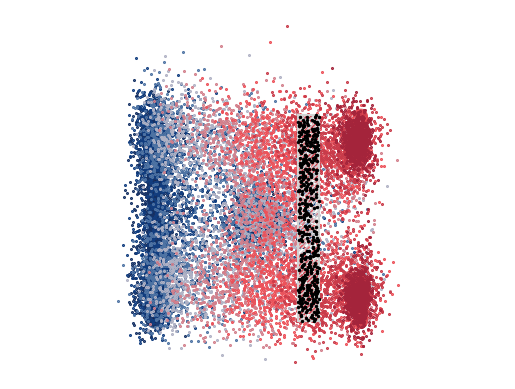

mmd          0.008034
norm_rmsd    4.558729
l2           0.448304
w2           1.533260
dtype: float64


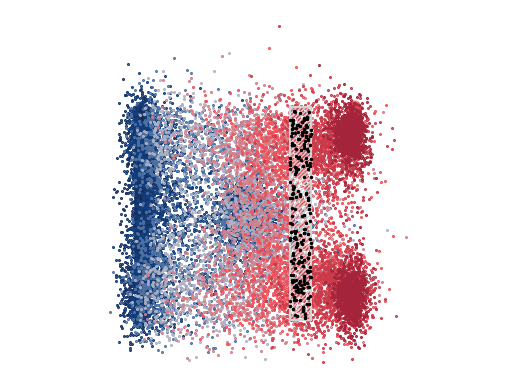

mmd          0.005961
norm_rmsd    4.691964
l2           0.202904
w2           1.057743
dtype: float64


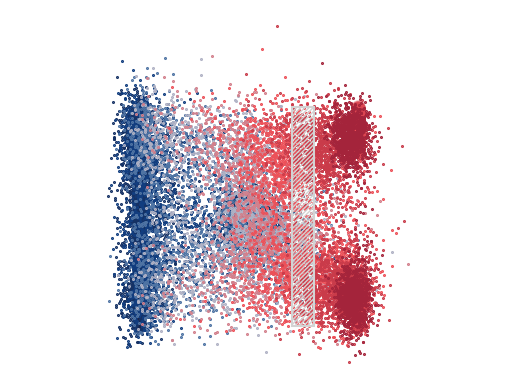

In [24]:
# Plot trajectories

for exp in d_experiments:
    draw_trajs_with_killing(exp)
    plt.gca().legend().remove()
    export_fig(f"usb_death_{exp.e.mass[-1]}_trajs")
    plt.show()

## Death & birth

#### Training

See `sb_v4.0.2.py`

#### Inference

In [ ]:
# Load experiments

db_experiment_prefix = "v4_final_large_death-births_no-mask_mass"
db_middle_masses = jnp.linspace(550, 1000, 6)
db_end_masses = jnp.linspace(750, 1300, 6)
db_masses = jnp.stack([db_middle_masses, db_end_masses]).T
db_runs_num = db_masses.shape[0]

db_experiments, db_trajs, db_statuses = [], [], []
for mm, em in zip(db_middle_masses, db_end_masses):
    db_experiment = Experiment.load("toy", f"{db_experiment_prefix}-{mm:.0f}-{em:.0f}")
    db_viewer = Viewer(random.PRNGKey(0), db_experiment)
    run_traj, _, run_status = db_viewer.get_fresh_trajectories(FORWARD)
    db_experiments.append(db_experiment)
    db_trajs.append(run_traj)
    db_statuses.append(run_status)

db_trajs = jnp.stack(db_trajs)
db_statuses = jnp.stack(db_statuses)

<Figure size 640x480 with 0 Axes>

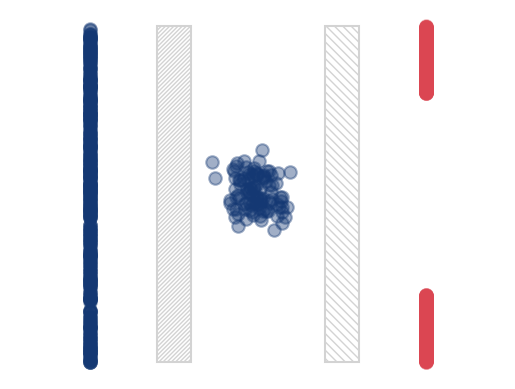

In [ ]:
# Plot marginals

draw_patches(load_patches("rectangle_death_birth"), plt.gcf())
plot_marginals(db_viewer.get_fresh_marginal(FORWARD), db_viewer.get_fresh_marginal(BACKWARD), projection=lambda x: x[...,:2])

plt.axis("off");
plt.gca().legend().remove()
export_fig("usb_death_birth_marginals")

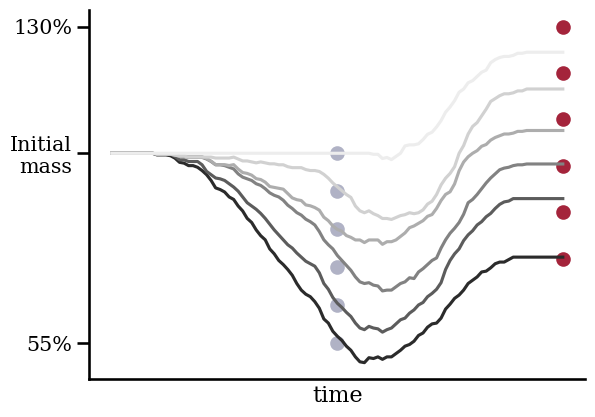

In [ ]:
# Plot mass evolution

for run_idx, run_alive_num in enumerate(db_statuses.mean(axis=-1)):
    plt.plot(run_alive_num / run_alive_num[0] * 1000, c=plt.cm.Greys_r((run_idx+1)/(db_runs_num+1)));
    plt.scatter(50, db_middle_masses[run_idx], c=cmap([.5]))
    plt.scatter(100, db_end_masses[run_idx], c=cmap([1.]))

plt.yticks([550, 1000, 1300], labels=["55%", "Initial\nmass", "130%"])
plt.xticks([])
plt.xlabel("time")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

export_fig("usb_death_birth_counts")

mmd          0.011322
norm_rmsd    4.652000
l2           0.482194
w2           1.673934
dtype: float64


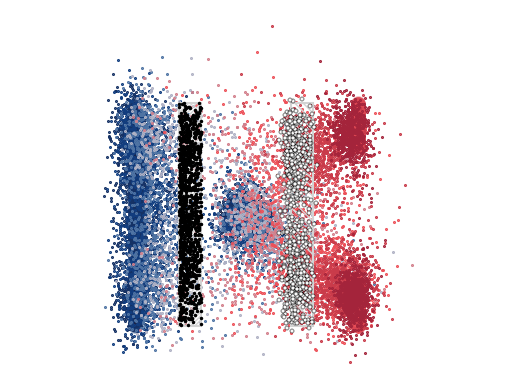

mmd          0.009334
norm_rmsd    4.522334
l2           0.374309
w2           1.509726
dtype: float64


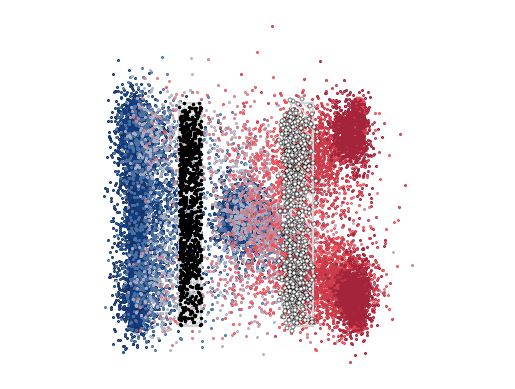

mmd          0.007249
norm_rmsd    4.572229
l2           0.241053
w2           1.269215
dtype: float64


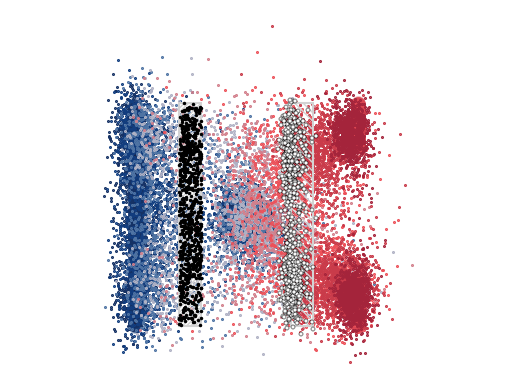

mmd          0.007452
norm_rmsd    4.607757
l2           0.224811
w2           1.225050
dtype: float64


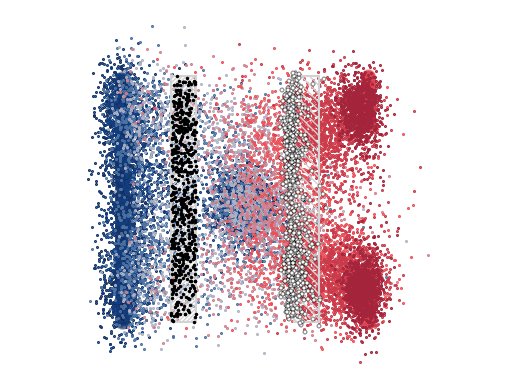

mmd          0.007365
norm_rmsd    4.514175
l2           0.228810
w2           1.249281
dtype: float64


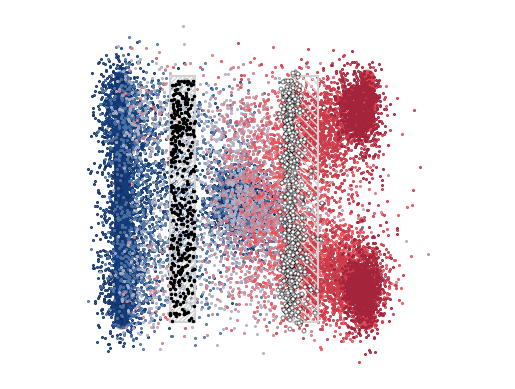

mmd          0.007086
norm_rmsd    4.589084
l2           0.214902
w2           1.213689
dtype: float64


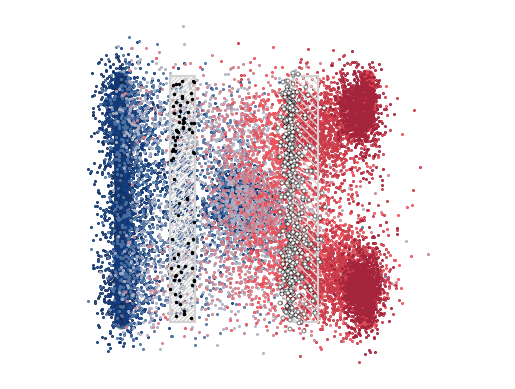

In [ ]:
# Plot trajectories

for exp in db_experiments:
    draw_trajs_with_killing(exp)
    plt.gca().legend().remove()
    export_fig(f"usb_death_birth_{exp.e.mass[-2]}-{exp.e.mass[-1]}_trajs")
    plt.show()

## Categorical dataset

#### Training

In [ ]:
# filter_status = False

# killing_function = "categorical_split_rectangle" if filter_status else "no_killing"

# cat_dataset_config = {
#     'dataset_name': "categorical",
#     'state_dims': 3,
#     'killing_function_name': killing_function,
# }

# cat_experiment_config = {
#     ## Experiment-dependent variables ############################
#     'objective': "divergence",

#     'times': [0, 100],
#     'mass': [1000, 500],

#     'init_components_num': 2,
#     'end_components_num': 2,

#     'ipf_mask_dead': True,

#     'steps_num': 100,
#     'batch_size': 512,
#     'paths_reuse': 5,
#     'hidden_dims': 32,

#     'eps': 1e-7,
#     'neginf': -10,
#     'plusinf': 7,

#     'experiment_name': f"v4_readying_figures",
# }

# cat_config = {
#     "dataset": cat_dataset_config,
#     "experiment": cat_experiment_config
# }


# cat_experiment = Experiment.create(cat_config)
# cat_trainer = Trainer(random.PRNGKey(0), cat_experiment)

# cat_trainer.train([1., 1., 1.])

# cat_experiment.save(f"final_filter_{'on' if filter_status else 'off'}")

#### Inference

In [25]:
cat_off_viewer = Viewer(random.PRNGKey(0), Experiment.load("categorical", "final_filter_off"))
cat_on_viewer = Viewer(random.PRNGKey(0), Experiment.load("categorical", "final_filter_on"))

[INFO]: Reloading params from cache
[INFO]: Reloading params from cache


In [26]:
cat_off_trajs, _, cat_off_statuses = cat_off_viewer.get_fresh_trajectories(FORWARD)
cat_on_trajs, _, cat_on_statuses = cat_on_viewer.get_fresh_trajectories(FORWARD)

<Figure size 640x480 with 0 Axes>

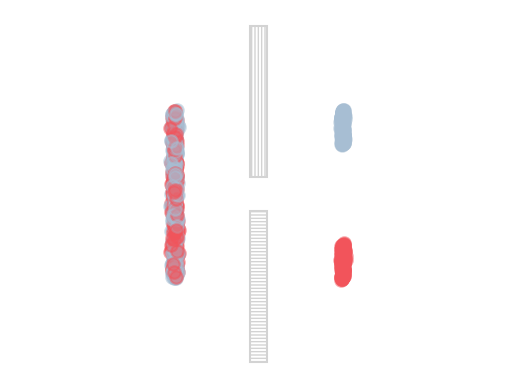

In [27]:
# Plot marginals (categories shown)

draw_patches(load_patches("categorical_split_rectangle"), plt.gcf())

cat_batch_size = cat_off_viewer.experiment.e.batch_size
for coords in cat_off_viewer.get_fresh_marginal(FORWARD): 
    cat_off_viewer.key, key_c = random.split(cat_off_viewer.key)
    plt.scatter(coords[0] + random.normal(key_c, shape=(1,)) * .1, coords[1], c=palette[random.choice(key_c, jnp.array([2,3]), shape=(1,))[0]], alpha=.5)

cat_t1_marg = cat_off_viewer.get_fresh_marginal(BACKWARD)
plt.scatter(*cat_t1_marg[cat_t1_marg[:,2] == 1.,:2].T + random.normal(cat_off_viewer.key, shape=((cat_t1_marg[:,2] == 1.).sum(),)) * .05, color=palette[2], alpha=.5)
plt.scatter(*cat_t1_marg[cat_t1_marg[:,2] == 0.,:2].T + random.normal(cat_off_viewer.key, shape=((cat_t1_marg[:,2] == 0.).sum(),)) * .05, color=palette[3], alpha=.5)

plt.axis("off")
export_fig("usb_categorical_marginals")

<Figure size 640x480 with 0 Axes>

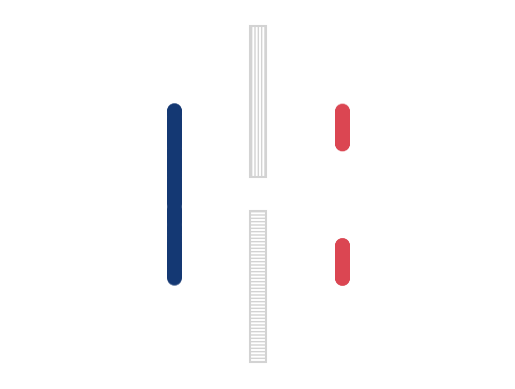

In [28]:
# Plot marginals (categories hidden)

draw_patches(load_patches("categorical_split_rectangle"), plt.gcf())
plot_marginals(cat_off_viewer.get_fresh_marginal(FORWARD), cat_off_viewer.get_fresh_marginal(BACKWARD), projection=lambda x: x[...,:2])

plt.axis("off");
plt.gca().legend().remove()
export_fig("usb_categorical_marginals_all")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


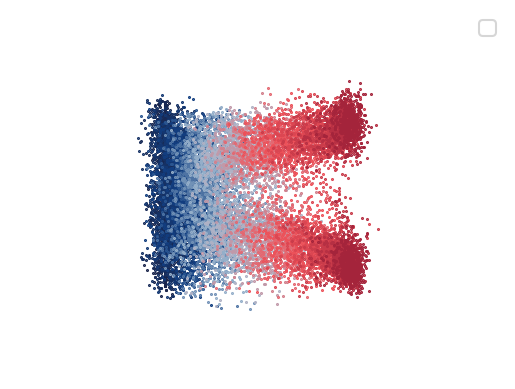

In [29]:
# Plot trajectories (no death, categories hidden)

# draw_patches(load_patches("categorical_split_rectangle"), plt.gcf())
plot_multiple_marginals(cat_off_trajs[::3,:,:2], jnp.ones(cat_off_trajs[::3,:].shape[:-1]).astype(bool), lambda x: x, jnp.arange(0, 101, 3))

plt.axis("off")
plt.axis("equal")
plt.ylim((-10, 10))
export_fig("usb_categorical_off_traj_all")

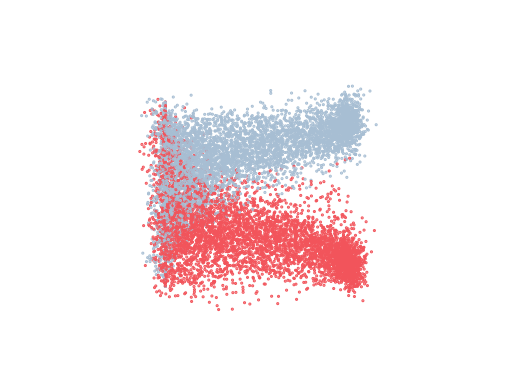

In [30]:
# Plot trajectories (no death, categories shown)

plt.scatter(cat_off_trajs[::5,:,0].ravel(), cat_off_trajs[::5,:,1].ravel(), s=.5, c=list(map(lambda x: palette[2] if x else palette[3], cat_off_trajs[::5,:,2].ravel())));

plt.axis("off")
plt.axis("equal")
plt.ylim((-10, 10))
export_fig("usb_categorical_off_trajs")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

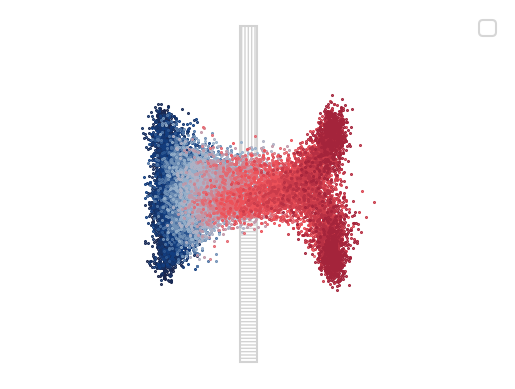

In [31]:
# Plot trajectories (death, categories hidden)

draw_patches(load_patches("categorical_split_rectangle"), plt.gcf())
plot_multiple_marginals(cat_on_trajs[::3,:,:2], jnp.ones(cat_on_trajs[::3,:].shape[:-1]).astype(bool), lambda x: x, jnp.arange(0, 101, 3))

plt.axis("off")
export_fig("usb_categorical_on_traj_all")

<Figure size 640x480 with 0 Axes>

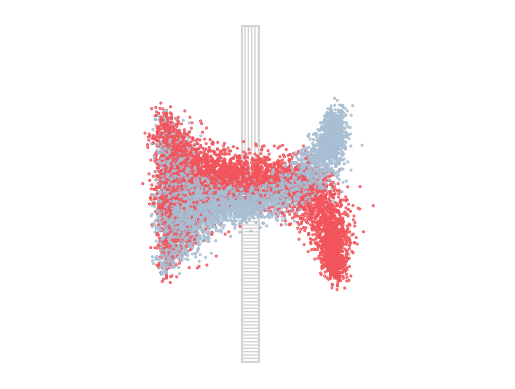

In [32]:
# Plot trajectories (death, categories shown)

draw_patches(load_patches("categorical_split_rectangle"), plt.gcf())

plt.scatter(cat_on_trajs[::5,:,0].ravel(), cat_on_trajs[::5,:,1].ravel(), s=.5, c=list(map(lambda x: palette[2] if x else palette[3], cat_on_trajs[::5,:,2].ravel())));

plt.axis("off")
export_fig("usb_categorical_on_trajs")